In [32]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from subprocess import check_output

ModuleNotFoundError: No module named 'wordcloud'

In [59]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
data = pd.read_csv('train.csv')

In [35]:
data.keys()

Index(['Unnamed: 0', 'Emotion', 'Text', 'Unnamed: 2'], dtype='object')

In [36]:
dftrain = data[['Emotion', 'Text']]

In [37]:
dftrain

,Emotion,Text
0,disgust,I took a psych. experiment with a totally unap...
1,disgust,Once when I was babysitting for some neighbors...
2,guilt,A friend asked to borrow my notes and I did no...
3,joy,Reunion with my wife after a legal separation.
4,anger,"I was at the corner shop, which I patronise re..."
5,shame,My boat didn't win a race which we were favore...
6,joy,I made dinner for some friends and they apprec...
7,guilt,When I laughed at a lame man walking down the ...
8,guilt,I was looking after a child and she fell down ...
9,disgust,"When I opted for my research field, for them t..."


In [38]:
data2 = pd.read_csv('test.csv')

In [39]:
dftest = data2[['Emotion', 'Text']]

In [40]:
dftest.head()

,Emotion,Text
0,guilt,I was working as a secretary. My boss was to ...
1,joy,When I won my car.
2,shame,I was ashamed when I got the lowest result (ma...
3,sadness,After the fact that made me ashamed I felt sad...
4,guilt,I felt guilty when I mislead a person into thi...


In [41]:
dftest.Emotion.unique()

array(['guilt', 'joy', 'shame', 'sadness', 'fear', 'anger', 'disgust'],
      dtype=object)

In [42]:
train_guilt = dftrain[dftrain['Emotion'] == 'guilt']
train_guilt = train_guilt['Text']
train_joy = dftrain[dftrain['Emotion'] == 'joy']
train_joy = train_joy['Text']
train_shame = dftrain[dftrain['Emotion'] == 'shame']
train_shame = train_shame['Text']
train_sadness = dftrain[dftrain['Emotion'] == 'sadness']
train_sadness = train_sadness['Text']
train_fear = dftrain[dftrain['Emotion'] == 'fear']
train_fear = train_fear['Text']
train_anger = dftrain[dftrain['Emotion'] == 'anger']
train_anger = train_anger['Text']
train_disgust = dftrain[dftrain['Emotion'] == 'disgust']
train_disgust = train_disgust['Text']


In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ompra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
stopwords_set = set(stopwords.words("english"))

In [45]:
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [47]:
dftrain.Emotion = dftrain.Emotion.map({'guilt':0, 'joy':1, 'shame':2, 'sadness':3, 'fear':4, 'anger':5, 'disgust':6})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [48]:
dftrain.head()

,Emotion,Text
0,6,I took a psych. experiment with a totally unap...
1,6,Once when I was babysitting for some neighbors...
2,0,A friend asked to borrow my notes and I did no...
3,1,Reunion with my wife after a legal separation.
4,5,"I was at the corner shop, which I patronise re..."


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(dftrain.Text)
X_train_counts.shape

(6012, 8049)

In [55]:
test = pd.Series(data = ["i am feeling so sad"])
t = count_vect.transform(test)
t.shape
t.data[0]

1

In [29]:
X_train_counts

<6012x8049 sparse matrix of type '<class 'numpy.int64'>'
	with 105115 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, dftrain.Emotion)

In [60]:
docs_new = dftest.Text
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = TfidfTransformer().fit_transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)
predicted

array([5, 1, 2, ..., 1, 1, 1], dtype=int64)

In [62]:
inn = input('enter your text')
test1 = pd.Series(data = [inn])
t1 = count_vect.transform(test1)
#t1.resize(1, 8049)
t1.shape
t1.data[0]
predicted1 = clf.predict(t1)
predicted1

enter your texti am not very happy with your service


array([1], dtype=int64)

In [63]:
dftest.Emotion = dftest.Emotion.map({'guilt':0, 'joy':1, 'shame':2, 'sadness':3, 'fear':4, 'anger':5, 'disgust':6})

dftest.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Emotion,Text
0,0,I was working as a secretary. My boss was to ...
1,1,When I won my car.
2,2,I was ashamed when I got the lowest result (ma...
3,3,After the fact that made me ashamed I felt sad...
4,0,I felt guilty when I mislead a person into thi...


In [64]:
import matplotlib.pyplot as plt

In [65]:
dftest.Emotion.shape

(1503,)

In [66]:
predicted.shape

(1503,)

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(dftest.Emotion,predicted)

4.385229540918163

In [69]:
print(type(predicted))

<class 'numpy.ndarray'>


In [70]:
y = dftest.Emotion.values

In [71]:

y.shape

(1503,)

In [72]:
from sklearn.metrics import confusion_matrix


In [73]:
cm = confusion_matrix(y,predicted)

In [74]:
labels = ['guilt', 'joy', 'shame', 'sadness', 'fear', 'anger', 'disgust']

TypeError: Image data cannot be converted to float

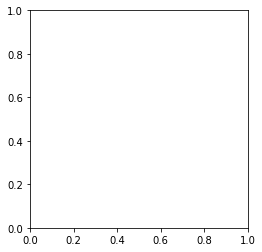

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(dftrain)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y,predicted)

0.5622089155023287

In [84]:
dftest.Emotion.value_counts()

1    219
5    216
3    216
4    215
2    214
6    213
0    210
Name: Emotion, dtype: int64

In [85]:
d = pd.DataFrame(predicted)

In [86]:
d.values

array([[5],
       [1],
       [2],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [87]:
output = pd.DataFrame(dftest.Text)

In [88]:
dftest.head()

,Emotion,Text
0,0,I was working as a secretary. My boss was to ...
1,1,When I won my car.
2,2,I was ashamed when I got the lowest result (ma...
3,3,After the fact that made me ashamed I felt sad...
4,0,I felt guilty when I mislead a person into thi...
